In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import r2_score

# pd.set_option('display.max_rows', None)

# a)

In [4]:
df = pd.read_csv("Real_estate.csv")
df.isnull().sum()
df.describe() 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


* There are no null values in the dataset

# b)

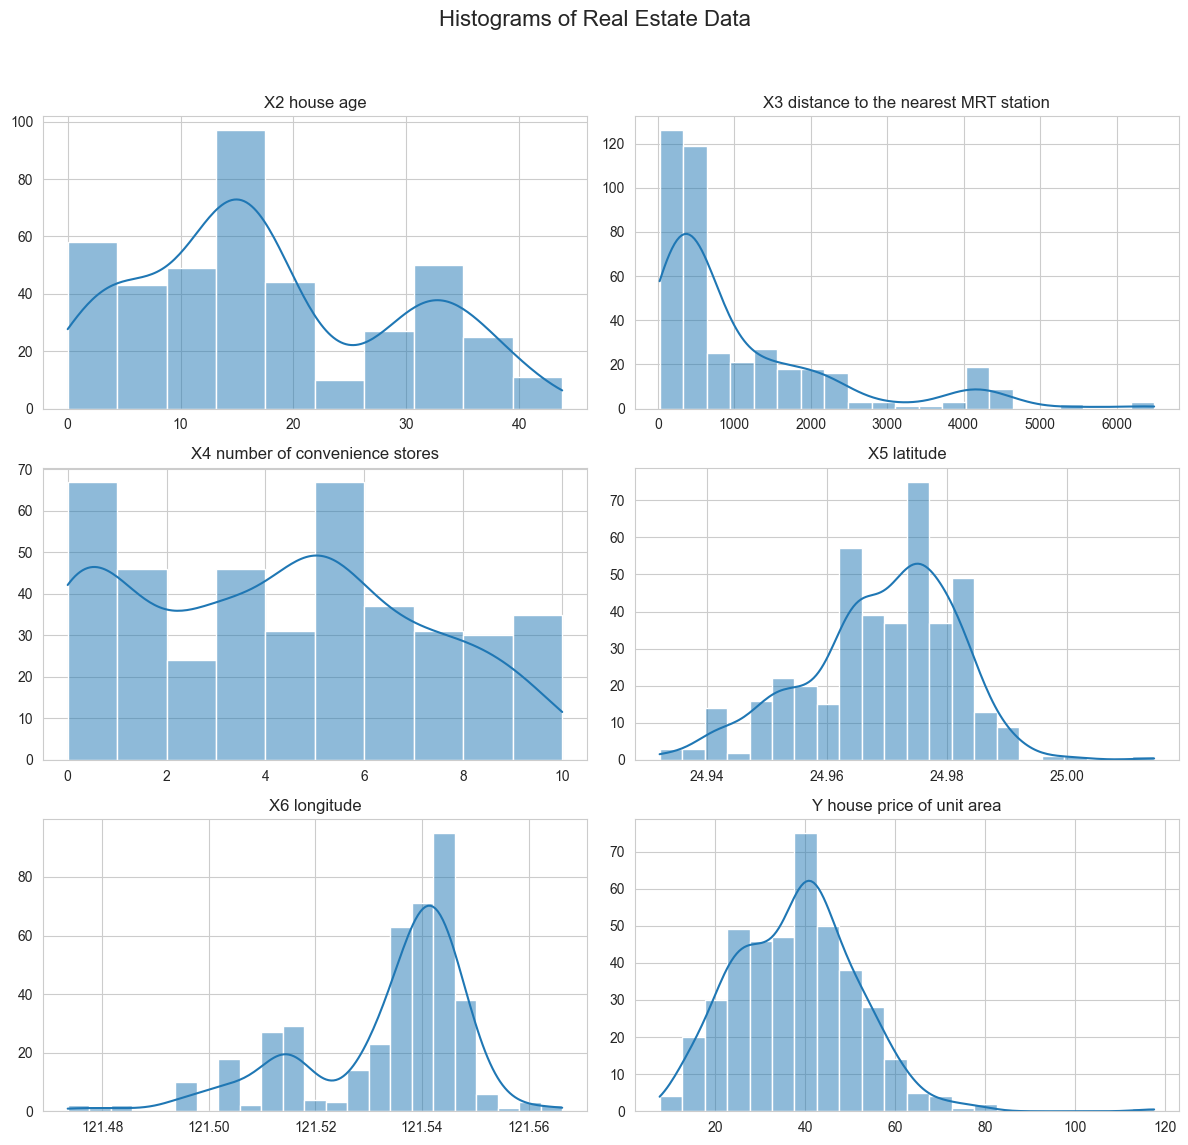

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores',
        'X5 latitude', 'X6 longitude', 'Y house price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

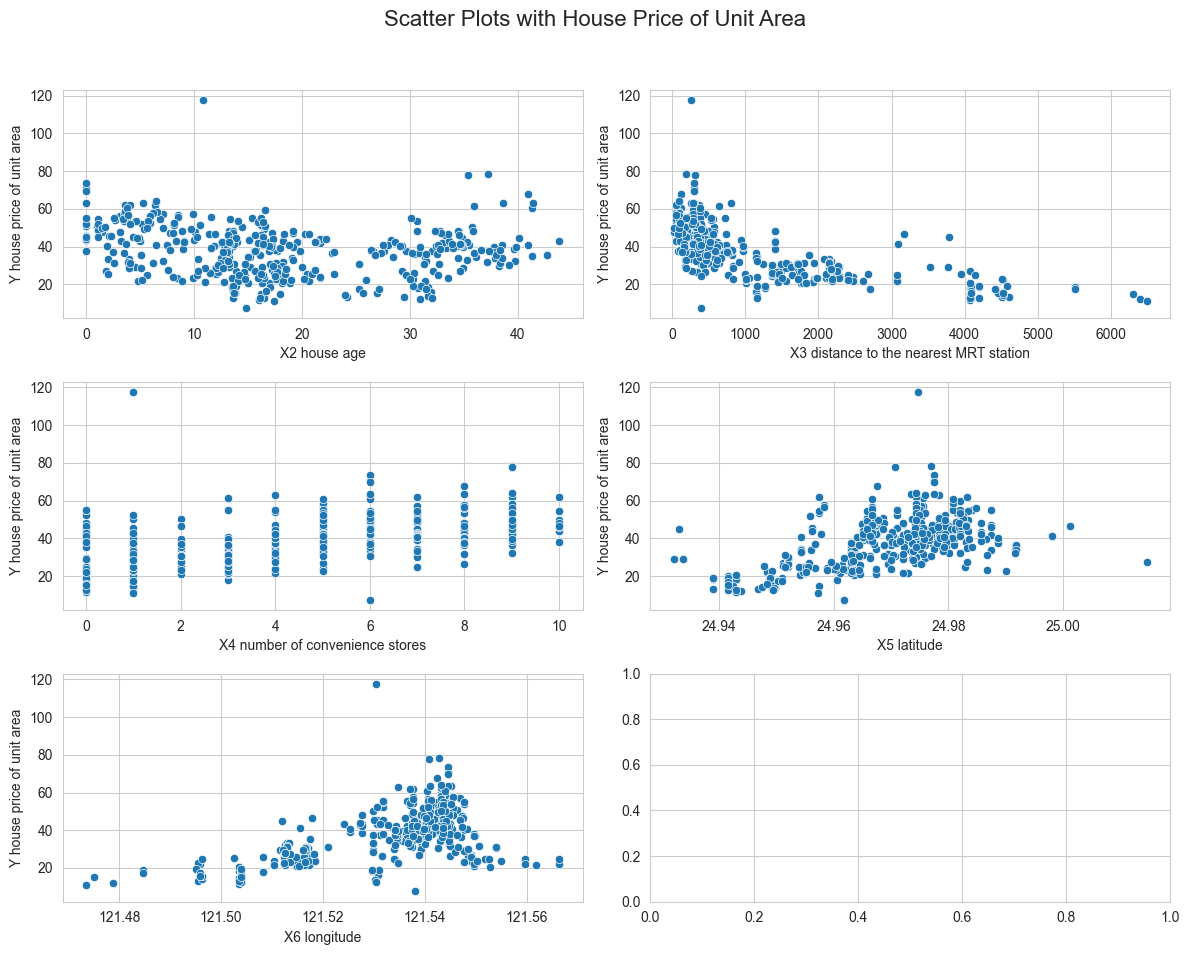

In [6]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)
# Scatter plot for each variable against the house price
sns.scatterplot(data=df, x='X2 house age', y='Y house price of unit area', ax=axes[0, 0])
sns.scatterplot(data=df, x='X3 distance to the nearest MRT station', y='Y house price of unit area', ax=axes[0, 1])
sns.scatterplot(data=df, x='X4 number of convenience stores', y='Y house price of unit area', ax=axes[1, 0])
sns.scatterplot(data=df, x='X5 latitude', y='Y house price of unit area', ax=axes[1, 1])
sns.scatterplot(data=df, x='X6 longitude', y='Y house price of unit area', ax=axes[2, 0])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# c)
* i

In [7]:
median_age = df['X2 house age'].median()
group1 = df[df['X2 house age'] > median_age]['Y house price of unit area']
group2 = df[df['X2 house age'] <= median_age]['Y house price of unit area']

t_stat, p_value = ttest_ind(group1, group2)
print(f"P-value: {p_value}")

P-value: 9.222058819283308e-07


* ii

In [8]:
groups = df.groupby('X4 number of convenience stores')['Y house price of unit area']
f_stat, p_value = f_oneway(*[group for name, group in groups])
print(f"P-value: {p_value}")


P-value: 1.1781067247237561e-36


* iii

In [9]:
contingency_table = pd.crosstab(df['X4 number of convenience stores'], df['X1 transaction date'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"P-value: {p_value}")

P-value: 0.6842665347405045


# d)

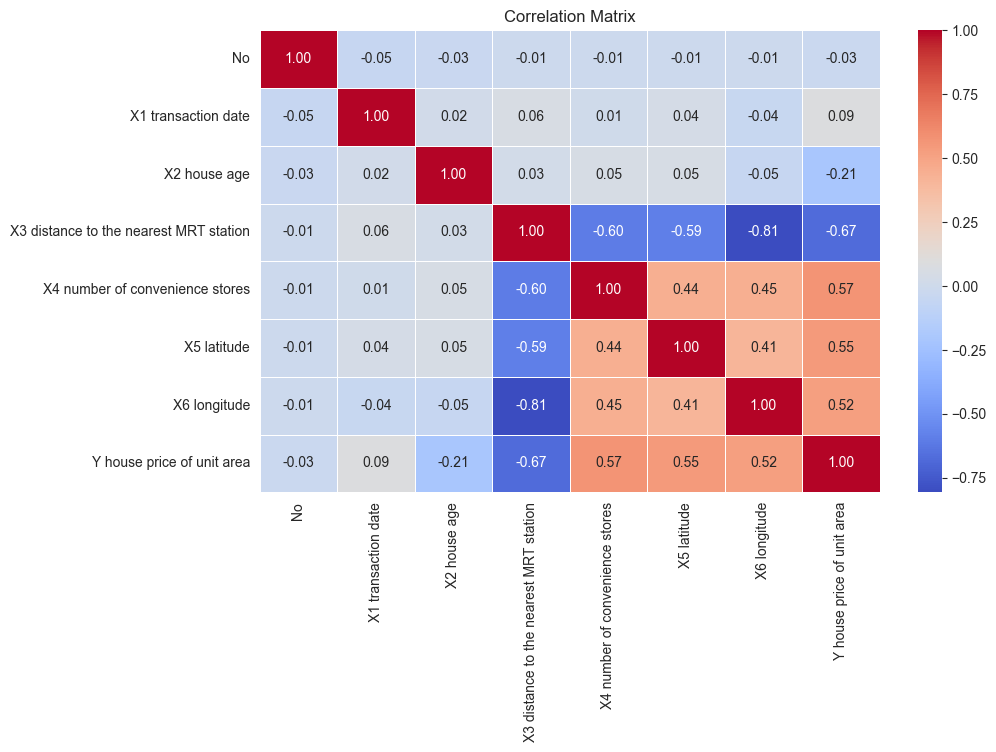

In [10]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

* strongest correlation with house price : X3 distance to the nearest MRT station
* weakest correlation with house price : X2 house age

# e)

In [11]:
X = df.drop(columns=["Y house price of unit area" , "No" , "X1 transaction date" ])
Y = df["Y house price of unit area"]

In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

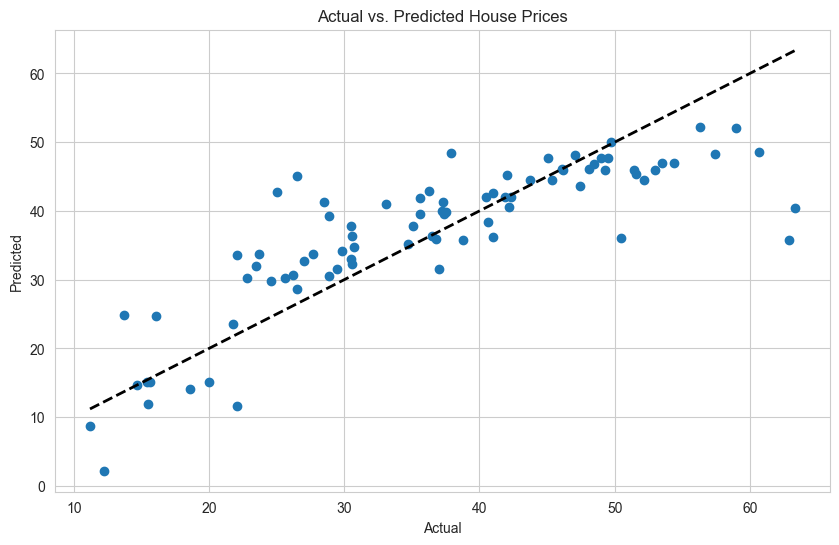

0.6746481382828127


In [14]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

print(r2_score(y_test , y_pred_lr))